In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import torch
print(torch.cuda.is_available())
import sys
import os
sys.path.append("./GLIP/")

from meshseg.models.GLIP.glip import GLIPModel
GM = GLIPModel()

True


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nkhalil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nkhalil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
c:\ProgramData\miniforge3\envs\meshseg\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


VISION BACKBONE USE GRADIENT CHECKPOINTING:  False
LANGUAGE BACKBONE USE GRADIENT CHECKPOINTING:  False
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B


C:\Users\nkhalil\AppData\Local\Temp\ipykernel_10832\2598663128.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("data/img/table.jpg")


(349, 474, 3)


c:\ProgramData\miniforge3\envs\meshseg\lib\site-packages\transformers\modeling_utils.py:977: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
c:\ProgramData\miniforge3\envs\meshseg\lib\site-packages\torch\nn\functional.py:3847: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")


inference time per image: 10.381636700000005


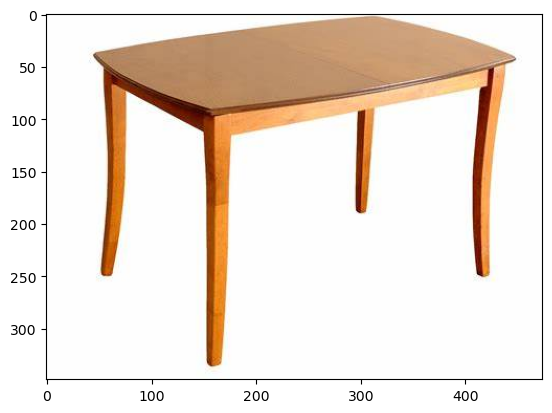

In [2]:
si = 128
img = imageio.imread("data/img/table.jpg")
# img = np.load('./penguin_rendered.npy').astype(np.uint8)
plt.imshow(img)
print(img.shape)
# prediction = GM.predict(img, "the feet of a penguin")
prediction = GM.predict(img, "the feet of a table")

BoxList(num_boxes=4, image_width=474, image_height=349, mode=xyxy)


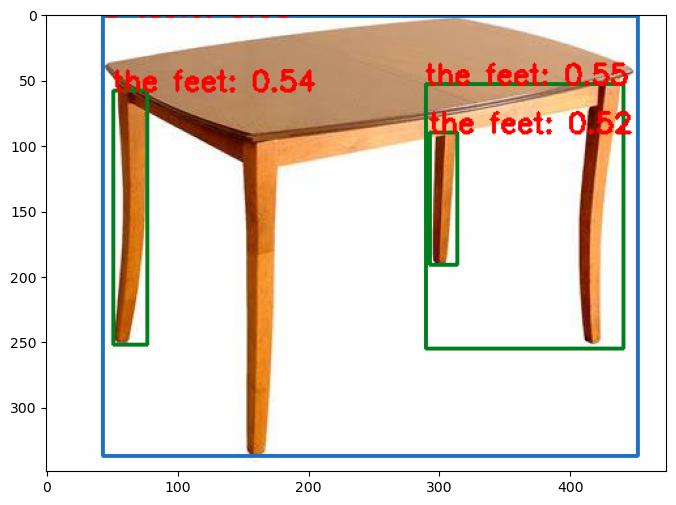

In [3]:
print(prediction[1])
# plt.figure(figsize=[15, 10])
plt.figure(figsize=[8, 6])
plt.imshow(prediction[0])
plt.show()

In [4]:
print(prediction[1].get_field("labels"))
print(prediction[1].get_field("scores"))

tensor([2, 1, 1, 1])
tensor([0.6028, 0.5469, 0.5446, 0.5242])


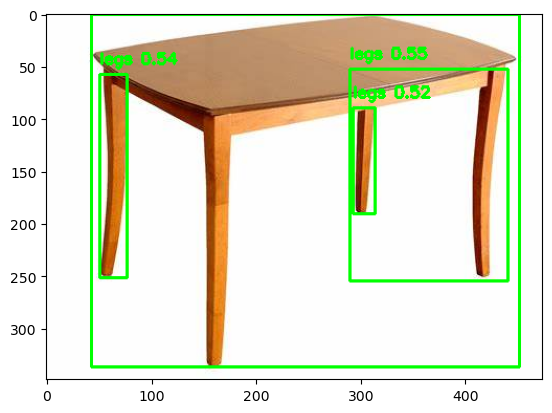

In [5]:
import cv2
import numpy as np
for i in range(len(prediction[1].bbox)):
    startX = int(prediction[1].bbox[i][0].item())
    startY = int(prediction[1].bbox[i][1].item())
    endX = int(prediction[1].bbox[i][2].item())
    endY = int(prediction[1].bbox[i][3].item())
    cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)
    score = np.round(prediction[1].get_field('scores')[i].item(), 2)
    cv2.putText(img, 'legs' + " " + str(score), (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
plt.imshow(img)
plt.show()

In [6]:
folder_path = 'outputs/demo/ABO/bookshelf/renders'
image_paths = []
images = []
for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    image_paths.append(image_path)
    images.append(imageio.imread(image_path))

C:\Users\nkhalil\AppData\Local\Temp\ipykernel_10832\935322798.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(image_path))


inference time per image: 7.109939400000002
Prompt: sides


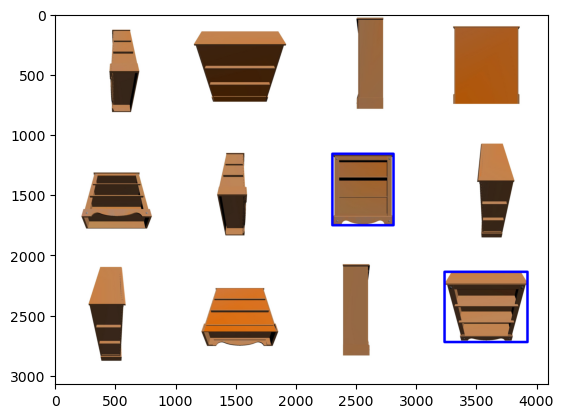

In [7]:
grid = np.array(images).reshape(4, 3, 1024, 1024, 3)
concatenated_image = np.concatenate([np.concatenate(row, axis=0) for row in grid], axis=1)
p = 'sides'
prediction = GM.predict(concatenated_image, f'the {p} of a bookshelf')
img_show = concatenated_image.copy()
num_bboxes = len(prediction[1].bbox)
print(f'Prompt: {p}')
for bbox_id in range(num_bboxes):
        if prediction[1].get_field("labels")[bbox_id] != 1:
            continue
        startX = int(prediction[1].bbox[bbox_id][0].item())
        startY = int(prediction[1].bbox[bbox_id][1].item())
        endX = int(prediction[1].bbox[bbox_id][2].item())
        endY = int(prediction[1].bbox[bbox_id][3].item())
        cv2.rectangle(img_show, (startX, startY), (endX, endY), [0, 0, 255], 20)
        score = prediction[1].get_field('scores')[bbox_id].item()

plt.imshow(img_show)
plt.show()

inference time per image: 4.40569
Prompt: sides


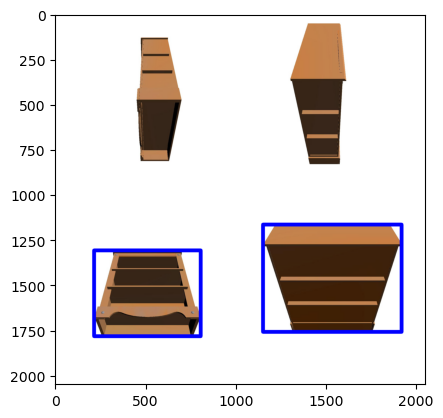

In [8]:
grid = np.array(images[:4]).reshape(2, 2, 1024, 1024, 3)
concatenated_image = np.concatenate([np.concatenate(row, axis=0) for row in grid], axis=1)
p = 'sides'
prediction = GM.predict(concatenated_image, f'the {p} of a bookshelf')
img_show = concatenated_image.copy()
num_bboxes = len(prediction[1].bbox)
print(f'Prompt: {p}')
for bbox_id in range(num_bboxes):
        if prediction[1].get_field("labels")[bbox_id] != 1:
            continue
        startX = int(prediction[1].bbox[bbox_id][0].item())
        startY = int(prediction[1].bbox[bbox_id][1].item())
        endX = int(prediction[1].bbox[bbox_id][2].item())
        endY = int(prediction[1].bbox[bbox_id][3].item())
        cv2.rectangle(img_show, (startX, startY), (endX, endY), [0, 0, 255], 20)
        score = prediction[1].get_field('scores')[bbox_id].item()

plt.imshow(img_show)
plt.show()

inference time per image: 12.931615999999998
Prompt: sides


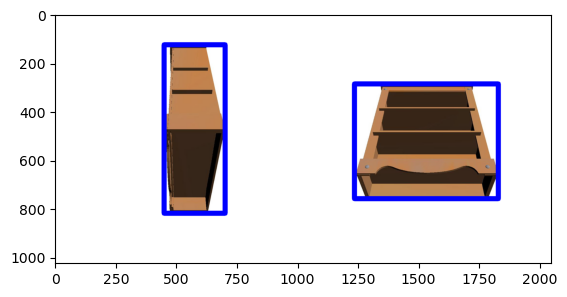

In [9]:
concatenated_image = np.hstack((images[0], images[1]))
p = 'sides'
prediction = GM.predict(concatenated_image, f'the {p} of a bookshelf')
img_show = concatenated_image.copy()
num_bboxes = len(prediction[1].bbox)
print(f'Prompt: {p}')
for bbox_id in range(num_bboxes):
        if prediction[1].get_field("labels")[bbox_id] != 1:
            continue
        startX = int(prediction[1].bbox[bbox_id][0].item())
        startY = int(prediction[1].bbox[bbox_id][1].item())
        endX = int(prediction[1].bbox[bbox_id][2].item())
        endY = int(prediction[1].bbox[bbox_id][3].item())
        cv2.rectangle(img_show, (startX, startY), (endX, endY), [0, 0, 255], 20)
        score = prediction[1].get_field('scores')[bbox_id].item()

plt.imshow(img_show)
plt.show()